In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report

In [ ]:
data_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UTS NLP/googleplaystore_user_reviews.csv")
data_raw.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
data = pd.concat([data_raw['Translated_Review'], data_raw['Sentiment']], axis=1)
data.dropna(axis=0, inplace=True)
data.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [ ]:
data.describe()

,Translated_Review,Sentiment
count,37427,37427
unique,27994,3
top,Good,Positive
freq,247,23998


In [ ]:
data.Sentiment.unique().tolist()

['Positive', 'Neutral', 'Negative']

In [ ]:
y, labels = pd.factorize(data.Sentiment)

In [ ]:
data.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

<ipython-input-48-7a68cd458735>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stars_count.index, y=stars_count.values, palette='Set2')


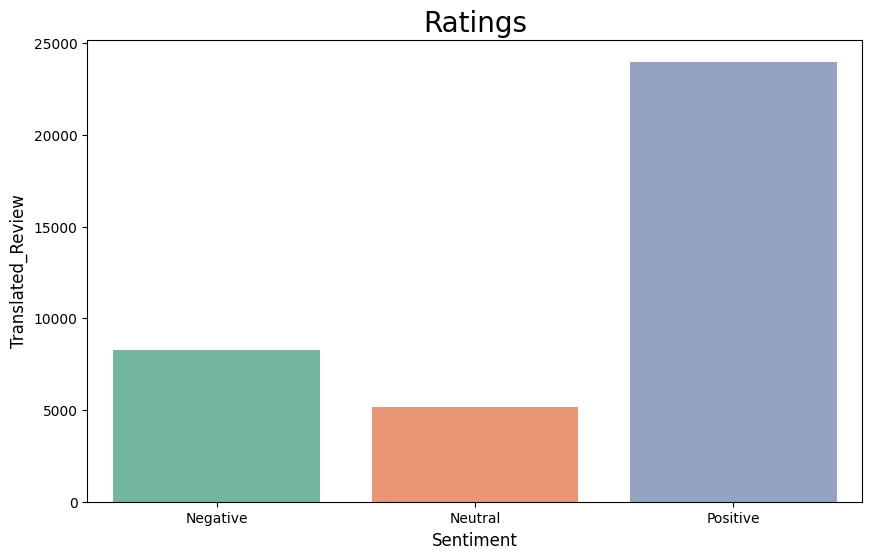

In [ ]:
stars_count = data['Sentiment'].value_counts()
stars_count = stars_count.sort_index()

fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stars_count.index, y=stars_count.values, palette='Set2')
plt.title("Ratings", fontsize=20)
plt.ylabel('Translated_Review', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()

In [ ]:
data_Sentiment = data[data.Sentiment != 3]
pd.set_option('mode.chained_assignment', None)
data_Sentiment["labels"] = data_Sentiment["Sentiment"].apply(lambda x: 1 if x == "Negative" else 0)
data_Sentiment = data_Sentiment.drop("Sentiment", axis=1)  # Menghapus kolom "Sentiment" jika memang tidak diperlukan untuk analisis berikutnya
data_Sentiment.head()

,Translated_Review,labels
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0


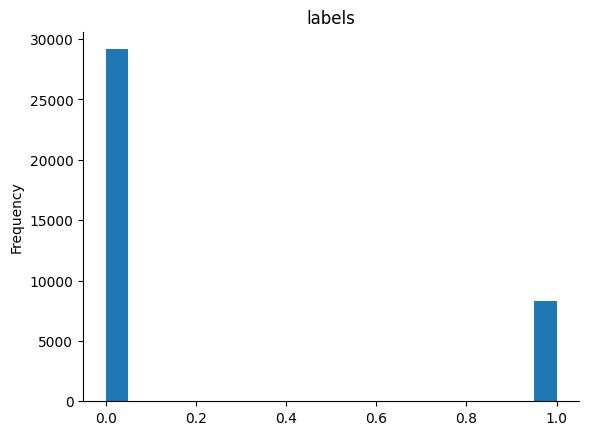

In [ ]:
# @title labels

from matplotlib import pyplot as plt
data_Sentiment['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-73-af3d8bd74c72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot (x=label_count.index, y=label_count.values, palette='Set2')


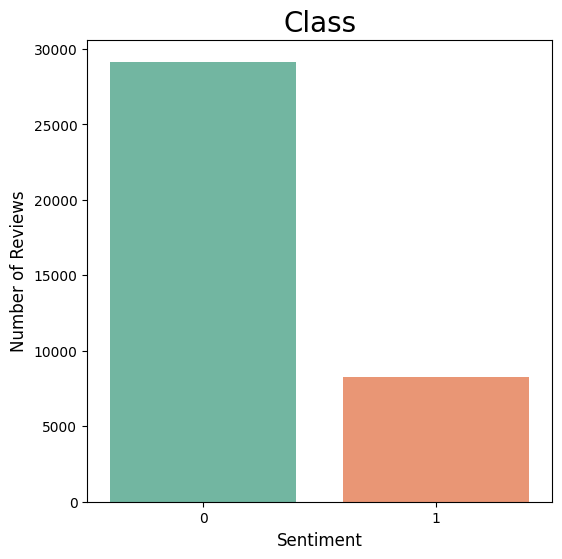

In [ ]:
label_count = data_Sentiment['labels'].value_counts()
label_count = label_count.sort_index()

fig = plt.figure(figsize=(6, 6))
ax = sns.barplot (x=label_count.index, y=label_count.values, palette='Set2')
plt.title("Class", fontsize = 20)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.xlabel("Sentiment", fontsize = 12);

In [ ]:
train, test = train_test_split(data_Sentiment, test_size=0.2, random_state=1)
X_train = train['Translated_Review'].values
X_test = test['Translated_Review'].values
y_train = train['labels']
y_test = test['labels']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def tokenize(text):
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.sten(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words ("english"))

vectorizer = CountVectorizer(
    analyzer='word',
    tokenizer=tokenize,
    lowercase=True,
    ngram_range=(1, 1),
    stop_words=en_stopwords
)

In [ ]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
from sklearn. feature_extraction. text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()

In [ ]:
teks = data.Translated_Review.tolist()

In [ ]:
print(type(teks))
print(teks[0])

<class 'list'>
I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"


In [ ]:
X = tfidfvectorizer.fit_transform(data['Translated_Review'].values.astype('U'))

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("Score for train: " + str(train_score))
print("Score for test: " + str(test_score))

Score for train: 0.9942643391521196
Score for test: 0.9157849738163941


In [ ]:
print("\nHere is the classification report:")
print(classification_report(y_test, y_pred))


Here is the classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6038
           1       0.88      0.83      0.86      1290
           2       0.92      0.79      0.85      2029

    accuracy                           0.92      9357
   macro avg       0.91      0.87      0.89      9357
weighted avg       0.92      0.92      0.91      9357



Data Trainingnya 99% rawan terhadap overfiting. Untuk itu saya coba lakukan perubahan di label supaya keseimbangan datanya tidak terlalu besar antara label 0(positif) dan 1(negatif)

In [ ]:
data_Sentiment = data[data.Sentiment != 3]
pd.set_option('mode.chained_assignment', None)
data_Sentiment["labels"] = data_Sentiment["Sentiment"].apply(lambda x: 1 if x == "Negative" or x == "Neutral" else 0)
data_Sentiment = data_Sentiment.drop("Sentiment", axis=1)  # Menghapus kolom "Sentiment" jika memang tidak diperlukan untuk analisis berikutnya
data_Sentiment.head()

,Translated_Review,labels
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0


In [ ]:
label_counts = data_Sentiment['labels'].value_counts()
print(label_counts)

0    23998
1    13429
Name: labels, dtype: int64


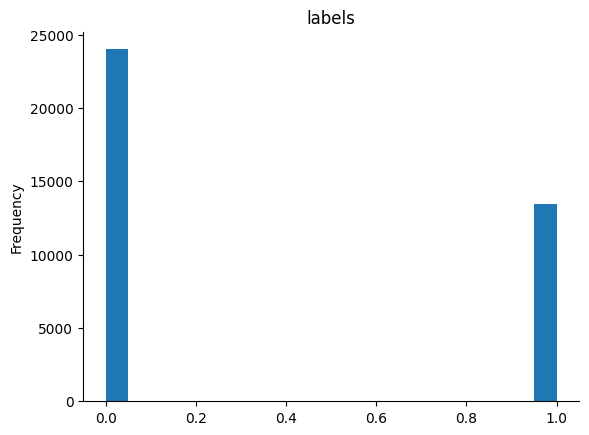

In [ ]:
# @title labels

from matplotlib import pyplot as plt
data_Sentiment['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-76-af3d8bd74c72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot (x=label_count.index, y=label_count.values, palette='Set2')


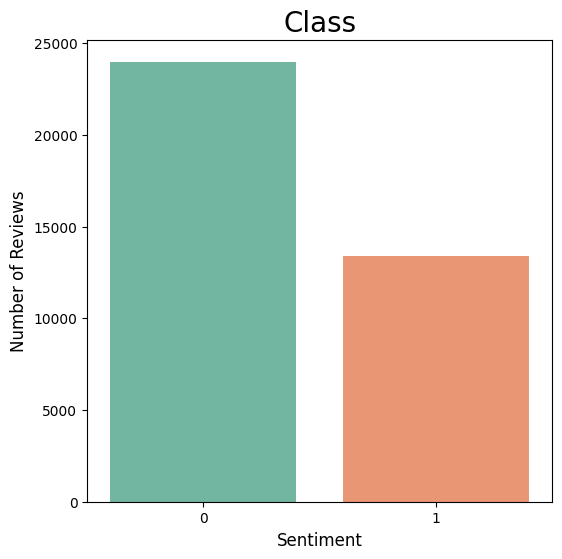

In [ ]:
label_count = data_Sentiment['labels'].value_counts()
label_count = label_count.sort_index()

fig = plt.figure(figsize=(6, 6))
ax = sns.barplot (x=label_count.index, y=label_count.values, palette='Set2')
plt.title("Class", fontsize = 20)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.xlabel("Sentiment", fontsize = 12);

In [ ]:
train, test = train_test_split(data_Sentiment, test_size=0.2, random_state=1)
X_train = train['Translated_Review'].values
X_test = test['Translated_Review'].values
y_train = train['labels']
y_test = test['labels']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def tokenize(text):
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.sten(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words ("english"))

vectorizer = CountVectorizer(
    analyzer='word',
    tokenizer=tokenize,
    lowercase=True,
    ngram_range=(1, 1),
    stop_words=en_stopwords
)

In [ ]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
from sklearn. feature_extraction. text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()

In [ ]:
teks = data_Sentiment.Translated_Review.tolist()

In [ ]:
print(type(teks))
print(teks[0])

<class 'list'>
I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"


In [ ]:
X = tfidfvectorizer.fit_transform(data_Sentiment['Translated_Review'].values.astype('U'))

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("Score for train: " + str(train_score))
print("Score for test: " + str(test_score))

Score for train: 0.9940505878161738
Score for test: 0.9182430266110932


In [ ]:
print("\nHere is the classification report:")
print(classification_report(y_test, y_pred))


Here is the classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6045
           1       0.88      0.83      0.86      1271
           2       0.94      0.80      0.86      2041

    accuracy                           0.92      9357
   macro avg       0.91      0.87      0.89      9357
weighted avg       0.92      0.92      0.92      9357

